### Setup

The following cells import and organize the dataset into a pandas DataFrame.

In [2]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Import the dataset from the cleaned csv file
survey_tidy = pd.read_csv('dataset/news_trust_data__clean.csv')

# Create a shorter DataFrame without the NewsSource and Source Trust columns (i.e. no duplicate RespondentID entries for different NewsSources)
survey_short = survey_tidy[survey_tidy['NewsSource'] == 'NYT'].drop(columns=['NewsSource', 'SourceTrust'])

# Check shape and head of datasets
print(survey_short.shape)
survey_short.head()

(1019, 9)


,RespondentID,Political_View,General_Trust,Pay_For_News,Data_Access,Trump_Approval,Age,Gender,Income
0,6176264298,Moderate,Fair Amount,No,No change,Strongly disapprove,30-44,Male,"10,000-24,999"
1,6176263960,Moderate,Fair Amount,No,Increase Trust,Somewhat disapprove,18-29,Female,"0-9,999"
2,6176258621,Liberal,Fair Amount,Yes,Increase Trust,Strongly disapprove,30-44,Male,"125,000-149,999"
3,6176257082,Liberal,Fair Amount,No,Increase Trust,Strongly disapprove,18-29,Male,"125,000-149,999"
4,6176256111,Liberal,Fair Amount,Yes,No change,Strongly disapprove,30-44,Male,"10,000-24,999"


In [2]:
# Check the tidy dataset
print(survey_tidy.shape)
survey_tidy.head()

(11209, 11)


,RespondentID,political_lean,general_trust,pay_for_news,data_access,Trump_Approval,Age,Gender,Income,NewsSource,SourceTrust
0,6176264298,Moderate,Fair Amount,No,No change,Strongly disapprove,30-44,Male,"10,000-24,999",NYT,1
1,6176263960,Moderate,Fair Amount,No,Increase Trust,Somewhat disapprove,18-29,Female,"0-9,999",NYT,1
2,6176258621,Liberal,Fair Amount,Yes,Increase Trust,Strongly disapprove,30-44,Male,"125,000-149,999",NYT,1
3,6176257082,Liberal,Fair Amount,No,Increase Trust,Strongly disapprove,18-29,Male,"125,000-149,999",NYT,0
4,6176256111,Liberal,Fair Amount,Yes,No change,Strongly disapprove,30-44,Male,"10,000-24,999",NYT,1


In [3]:
# Preferred order of categories
order = {}
order['data_access'] = ['Decrease Trust', 'No change', 'Increase Trust']
order['general_trust'] = ['None at all', 'Not very much', 'Fair Amount', 'Great Amount']
order['Income'] = ['0-9,999', '10,000-24,999', '25,000-49,999', '50,000-74,999', '75,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-174,999', '175,000-199,999', '200,000+', 'Prefer not to answer']
order['Trump_Approval'] = ['Strongly disapprove', 'Somewhat disapprove', 'Somewhat approve', 'Strongly approve']
order['political_lean'] = ['Very Liberal', 'Liberal', 'Moderate', 'Conservative', 'Very Conservative']

# Set order for specified categories
for c in order.keys():
    survey_short[c] = pd.Categorical(survey_short[c], order[c])

# Check dtypes
#survey.info()

## Scratch

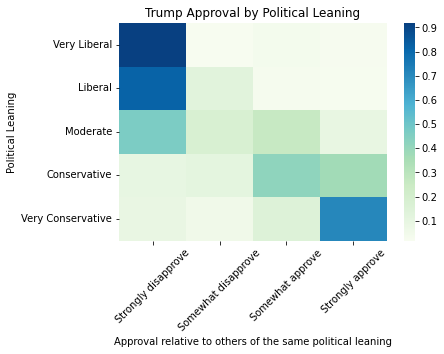

In [14]:
# Trump Approval, relative to each political leaning
approval_heat = sns.heatmap(pd.crosstab(survey['political_lean'], survey['Trump_Approval'], normalize='index'), cmap='GnBu')
approval_heat.set(title='Trump Approval by Political Leaning', xlabel='Approval relative to others of the same political leaning', ylabel='Political Leaning')
plt.xticks(rotation=45)
approval_heat;

In [47]:
pd.crosstab(survey_tidy['political_lean'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')

NewsSource,Breitbart,BuzzFeed_News,CNN,FoxNews,HuffPo,NYT,Time,USA_TODAY,USNWR,WSJ,WaPo
political_lean,,,,,,,,,,,
Conservative,0.447368,0.085714,0.125000,0.462882,0.078313,0.071078,0.100000,0.175141,0.147465,0.151786,0.064815
Liberal,0.000000,0.314286,0.282738,0.043668,0.325301,0.338235,0.311111,0.282486,0.267281,0.270833,0.354938
Moderate,0.157895,0.342857,0.425595,0.323144,0.391566,0.384804,0.422222,0.395480,0.410138,0.422619,0.354938
Very Conservative,0.394737,0.000000,0.020833,0.157205,0.024096,0.012255,0.014815,0.028249,0.032258,0.038690,0.015432
Very Liberal,0.000000,0.257143,0.145833,0.013100,0.180723,0.193627,0.151852,0.118644,0.142857,0.116071,0.209877


In [46]:
pd.crosstab(survey_tidy['general_trust'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')

NewsSource,Breitbart,BuzzFeed_News,CNN,FoxNews,HuffPo,NYT,Time,USA_TODAY,USNWR,WSJ,WaPo
general_trust,,,,,,,,,,,
Fair Amount,0.105263,0.542857,0.639881,0.270742,0.650602,0.649510,0.640741,0.644068,0.566820,0.544643,0.623457
Great Amount,0.000000,0.114286,0.122024,0.026201,0.138554,0.129902,0.103704,0.084746,0.124424,0.101190,0.154321
None at all,0.289474,0.057143,0.029762,0.248908,0.024096,0.026961,0.014815,0.033898,0.055300,0.074405,0.021605
Not very much,0.605263,0.285714,0.208333,0.454148,0.186747,0.193627,0.240741,0.237288,0.253456,0.279762,0.200617


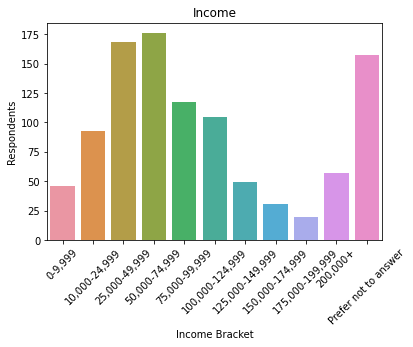

In [44]:
#plt.figure(figsize=(15,8))
income_plt = sns.countplot(x="Income", data=survey)
income_plt.set(title='Income', xlabel='Income Bracket', ylabel='Respondents')
plt.xticks(rotation=45)
income_plt;

In [28]:
others = pd.read_csv('dataset/all_responses_coded.csv', index_col=0)['A21']
others.value_counts()

0                                                                                                                                                                                                                                                                                   701
None                                                                                                                                                                                                                                                                                 31
NPR                                                                                                                                                                                                                                                                                  22
none                                                                                                                                                            

In [29]:
others = [e.lower().strip("'\".") for e in others]

In [46]:
sources = ['0', 'none', 'npr', 'msnbc', 'pbs', 'vice', 'oann', 'bbc', 'al jazeera', 'al-jazeera', 'cbc', 'reuters', 'local']
count = dict.fromkeys(sources, 0)
#count = {'0':0, 'none':0, 'npr':0, 'msnbc':0, 'pbs':0, 'vice':0, 'oann':0, 'bbc':0}
for e in others:
    for s in sources:
        if s in e:
            count[s] += 1
print(count)

{'0': 701, 'none': 81, 'npr': 47, 'msnbc': 22, 'pbs': 13, 'vice': 3, 'oann': 1, 'bbc': 36, 'al jazeera': 3, 'al-jazeera': 1, 'cbc': 2, 'reuters': 6, 'local': 9}
